In [15]:
import pandas as pd
from data_preprocessing import get_cleaned_data_final, convert_numberical_to_categorical
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [16]:
raw_data = get_cleaned_data_final()

# select only the columns with target = 0
# target_value = 0
# data = data[data["TARGET"] == target_value]

In [17]:
data = raw_data

data = convert_numberical_to_categorical(data)

remove_cols = [
    		'OBS_60_CNT_SOCIAL_CIRCLE', 
            'DEF_60_CNT_SOCIAL_CIRCLE',
			'FLAG_WORK_PHONE', 
			'FLAG_EMP_PHONE',
			'FLAG_CONT_MOBILE',
			'FLAG_PHONE',
			'REG_CITY_NOT_LIVE_CITY',
			'LIVE_REGION_NOT_WORK_REGION',
			'FLAG_EMAIL',
			'LIVE_CITY_NOT_WORK_CITY'

            ,'NAME_HOUSING_TYPE', 'EXT_SOURCE_2', 'HOUR_APPR_PROCESS_START'
			]

data = data.drop(columns=remove_cols)

categorial_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

assert len(categorial_columns) + len(numerical_columns) == len(data.columns)

print("Categorial columns: ", categorial_columns)
print("Numerical columns: ", numerical_columns)


Categorial columns:  Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')
Numerical columns:  Index([], dtype='object')


In [18]:
def create_dataset(data, num=None):
    dataset = []
    if num is None:
        num = len(data)
    for i in range(0, num):
        dataset.append(list(map(str, data.iloc[i].values.tolist())))
    print("Dataset created")
    return dataset
dataset = create_dataset(data, None)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
print("TE created")
print("TE array shape: ", te_ary.shape)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
print("Freq itemsets created")
frequent_itemsets.to_csv(f"../data/all_frequent_itemset.csv")

Dataset created
TE created
TE array shape:  (302751, 135)
Freq itemsets created


In [19]:
# frequent_itemsets = pd.read_csv(f"../data/TARGET_1_frequent_itemsets_1.csv")
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("Rules created")

Rules created


In [20]:
rules.to_csv(f"../data/all_association_rules.csv")

In [29]:
show_num = 50

In [30]:
sorted_by_support = frequent_itemsets.sort_values(by="support", ascending=False)
print(sorted_by_support.head(show_num).to_string())

      support                                                                                      itemsets
19   0.918643                                                                                    (TARGET_0)
12   0.904853                                                               (NAME_CONTRACT_TYPE_Cash loans)
71   0.828757                                                     (NAME_CONTRACT_TYPE_Cash loans, TARGET_0)
16   0.812186                                                               (NAME_TYPE_SUITE_Unaccompanied)
18   0.748919                                                               (REGION_RATING_CLIENT_W_CITY_2)
78   0.745332                                                     (NAME_TYPE_SUITE_Unaccompanied, TARGET_0)
3    0.734993                                                                         (CNT_FAM_MEMBERS_0_3)
68   0.733299                                (NAME_TYPE_SUITE_Unaccompanied, NAME_CONTRACT_TYPE_Cash loans)
6    0.725979               

In [31]:
sorted_by_confidence = rules.sort_values(by="confidence", ascending=False)
print(sorted_by_confidence.head(show_num).to_string(index=False))

                                                                                  antecedents                     consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                                                                              (CODE_GENDER_F)                      (TARGET_0)            0.659268            0.918643 0.612837    0.929572 1.011897  0.007205    1.155184       0.034506
                                               (NAME_CONTRACT_TYPE_Cash loans, CODE_GENDER_F)                      (TARGET_0)            0.595024            0.918643 0.552015    0.927719 1.009880  0.005401    1.125568       0.024158
                                                                (DAYS_ID_PUBLISH_-5000_-2000)                      (TARGET_0)            0.664979            0.918643 0.615261    0.925235 1.007176  0.004383    1.088167       0.021266
                                                                 (NA

In [32]:
sorted_by_lift = rules.sort_values(by="lift", ascending=False)
print(sorted_by_lift.head(show_num).to_string(index=False))

                                                                       antecedents                                                                        consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                                                             (AMT_CREDIT_0_600000)                                                              (AMT_ANNUITY_0_30000)            0.602624            0.653349 0.532870    0.884250 1.353412  0.139147    2.994828       0.657127
                                                             (AMT_ANNUITY_0_30000)                                                              (AMT_CREDIT_0_600000)            0.653349            0.602624 0.532870    0.815598 1.353412  0.139147    2.154949       0.753284
                                                                  (FLAG_OWN_CAR_N)                                                                    (CODE_GENDER_F)            0.66

In [33]:
sorted_by_leverage = rules.sort_values(by="leverage", ascending=False)
print(sorted_by_leverage.head(show_num).to_string(index=False))

                                                                       antecedents                                                                        consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                                                             (AMT_CREDIT_0_600000)                                                              (AMT_ANNUITY_0_30000)            0.602624            0.653349 0.532870    0.884250 1.353412  0.139147    2.994828       0.657127
                                                             (AMT_ANNUITY_0_30000)                                                              (AMT_CREDIT_0_600000)            0.653349            0.602624 0.532870    0.815598 1.353412  0.139147    2.154949       0.753284
                                                                   (CODE_GENDER_F)                                                                   (FLAG_OWN_CAR_N)            0.65

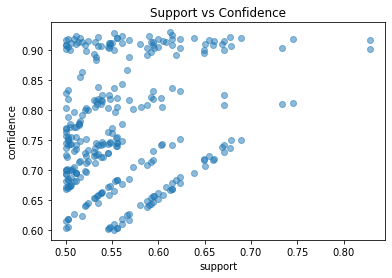

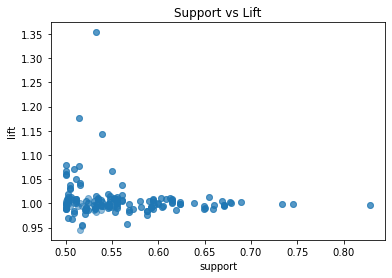

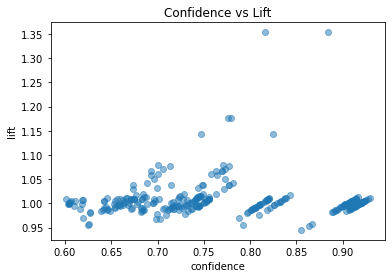

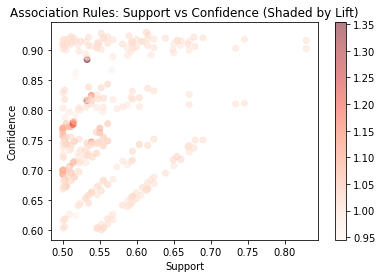

In [34]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot support vs. confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Plot support vs. lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Plot confidence vs. lift
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

# Plot support vs. confidence with shading as lift
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='Reds', alpha=0.5)
plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Shaded by Lift)')
plt.show()